In [4]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 1d
For the following FEM solution, calculate $L_2$ and $H^1$ norm of $u_{analytical}-u_{FEM}$.

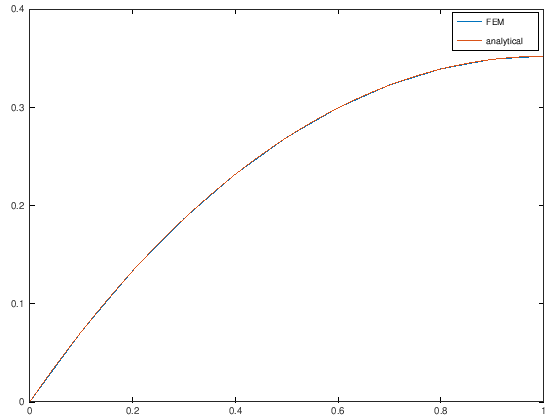

In [5]:
%% boundary value problem:
%   -k*u''(x)+k0*u(x)=g
%   u(0)=U
%   -k*u(L)=T

k=1;
k0=1; 
L=1;
f=1; Uhat=0; g=f+k0*Uhat;
U=0;
T=0;

%% network
N=10;
POINTS=linspace(0,L,N+1)';
n_POINTS=size(POINTS,1);
ELEMENTS=[(1:n_POINTS-1)' (2:n_POINTS)'];
n_ELEMENTS=size(ELEMENTS,1);
DBOUNDARY=1;
DVALUE=U;
FREENODE=true(n_POINTS,1); FREENODE(DBOUNDARY)=false;
NBOUNDARY=n_POINTS;
NVALUE=T;
LENGTHS=POINTS(ELEMENTS(:,2))-POINTS(ELEMENTS(:,1));
% CENTERS= % coordinates of centers of all elements
MATERIALS=k*ones(n_ELEMENTS,1);
F=g*ones(n_ELEMENTS,1);
MATERIALS0=k0*ones(n_ELEMENTS,1);

%% local matrices and rhs
A_local=[1 -1; -1 1];
M_local=[1/3 1/6; 1/6 1/3];
b_local=[1/2; 1/2];

%% global matrix and rhs
A=zeros(n_POINTS);
M=zeros(n_POINTS);
b=zeros(n_POINTS,1);
for i=1:n_ELEMENTS
    A(ELEMENTS(i,:),ELEMENTS(i,:))=A(ELEMENTS(i,:),ELEMENTS(i,:))+A_local*MATERIALS(i)/LENGTHS(i);
    M(ELEMENTS(i,:),ELEMENTS(i,:))=M(ELEMENTS(i,:),ELEMENTS(i,:))+M_local*MATERIALS0(i)*LENGTHS(i);
    b(ELEMENTS(i,:))=b(ELEMENTS(i,:))+b_local*F(i)*LENGTHS(i);
end
AM=A+M;
%% boundary value conditions and solution
u=zeros(n_POINTS,1);
u(~FREENODE)=DVALUE;
b=b-AM*u;
b(NBOUNDARY)=b(NBOUNDARY)-NVALUE;
u(FREENODE)=AM(FREENODE,FREENODE)\b(FREENODE);
figure; plot(POINTS,u); hold on

%% analytical solution
K=sqrt(k0/k);
C1=(T/k+(U-g/k0)*K*exp(K*L))/K/(exp(-K*L)+exp(K*L));
C2=U-C1-g/k0;
u_analyt=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;
x=linspace(0,L,100);    % points of visualization
hold on; plot(x,u_analyt(x))   % plot of the analytical solution
legend('FEM','analytical');

In [6]:
%% L2 norm:
I=0;
for i=1:n_ELEMENTS
    x1=POINTS(ELEMENTS(i,1));
    x2=POINTS(ELEMENTS(i,2));
    u1=u(ELEMENTS(i,1));
    u2=u(ELEMENTS(i,2));
    u_h=@(x)(x2-x)*u1/(x2-x1)+(x-x1)*u2/(x2-x1);
    arg_int=@(x)(u_analyt(x)-u_h(x)).^2;
    I=I+integral(arg_int,x1,x2);
end
L2_norm=sqrt(I)

L2_norm = 5.8797e-04


In [7]:
%% derivative L2 norm:
u_der=(u(2:end)-u(1:end-1))./LENGTHS;
u_analyt_der=@(x)-K*C1*exp(-K*x)+K*C2*exp(K*x);
I_der=0;
for i=1:n_ELEMENTS
    arg_int=@(x)(u_analyt_der(x)-u_der(i)).^2;
    x1=POINTS(ELEMENTS(i,1));
    x2=POINTS(ELEMENTS(i,2));
    I_der=I_der+integral(arg_int,x1,x2);
end
L2_der_norm=sqrt(I_der)

L2_der_norm = 0.022184


In [8]:
%% H1 norm
H1_norm=sqrt(I+I_der)

H1_norm = 0.022192


## Numerical experiments:
1) Examine changes of the resulting error of the numerical solution when changing N.